In [71]:
import pandas as pd
from ebmdatalab import bq
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

# Get statins measure data to plot

In [72]:
with open('statins.sql') as sql:
    statin_measure = bq.cached_read(sql.read(), csv_path='statins.zip')
statin_measure['calc_value'] = statin_measure['numerator']/statin_measure['denominator']
statin_measure['month'] = pd.to_datetime(statin_measure['month'])
#statin_measure = statin_measure.set_index('month')

In [73]:
statin_measure.head()

,code,denominator,month,numerator,calc_value
0,F85615,340,2010-08-01,297,0.873529
1,F86658,178,2010-08-01,144,0.808989
2,M84612,483,2010-08-01,415,0.859213
3,G82650,300,2010-08-01,201,0.670000
4,D82036,936,2010-08-01,753,0.804487


In [74]:
sql = '''SELECT DISTINCT code, ccg_id FROM ebmdatalab.hscic.practices'''
ccg_map = bq.cached_read(sql, csv_path='ccg.zip')
ccg_map.head()

,code,ccg_id
0,Y06442,NaN
1,Y06450,NaN
2,Y06439,NaN
3,01Y999,NaN
4,09X999,NaN


# Get and filter change detection results

In [75]:
pd.set_option('display.max_rows', 100)
statins_changes = pd.read_csv('r_output.csv')
statins_changes = statins_changes.sort_values('is.slope.ma')
statins_changes = statins_changes.loc[statins_changes['is.intlev.levd']>=0.25] #total change of >25%
statins_changes = statins_changes.loc[statins_changes['is.slope.ma']<=-0.05] #slope of >5%
print(len(statins_changes))
statins_changes

96


,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
6787,Y02795,5,3.0,3.0,NaN,NaN,28.0,-1.032868,-1.464610,1.910468,0.720643,0.180006,0.540636,0.750214
5996,N85643,6,2.0,2.0,32.0,32.0,31.0,-1.000000,-1.365765,3.497056,0.738099,0.452144,0.285955,0.387421
6624,Y00344,3,25.0,25.0,25.0,25.0,25.0,-0.732466,-14.677554,1.035328,0.782370,0.074898,0.707472,0.904268
5910,N84010,3,53.0,53.0,NaN,NaN,53.0,-0.714369,-0.937526,2.511821,0.785687,0.429966,0.355721,0.452752
6682,Y01690,5,6.0,6.0,6.0,6.0,31.0,-0.713073,-1.039935,1.280566,1.000000,0.443158,0.556842,0.556842
2823,F85043,4,13.0,13.0,13.0,13.0,47.0,-0.577786,-0.798580,1.335085,0.727933,0.295162,0.432771,0.594520
1300,C84602,4,20.0,20.0,42.0,42.0,42.0,-0.487741,-0.605306,0.997451,0.822818,0.333830,0.488988,0.594284
3770,H85023,5,2.0,2.0,NaN,NaN,53.0,-0.472221,-0.597047,1.296176,0.795853,0.431534,0.364318,0.457771
5024,M83007,3,11.0,11.0,11.0,11.0,11.0,-0.454525,-1.352212,0.876622,0.790659,0.272164,0.518496,0.655776
2829,F85053,4,15.0,15.0,15.0,15.0,54.0,-0.452108,-0.556786,1.601826,0.816203,0.533958,0.282245,0.345803


In [76]:
ccg = statins_changes.merge(ccg_map,how='left',left_on='name',right_on='code')
len(ccg['ccg_id'].unique())

57

# Plot some good examples

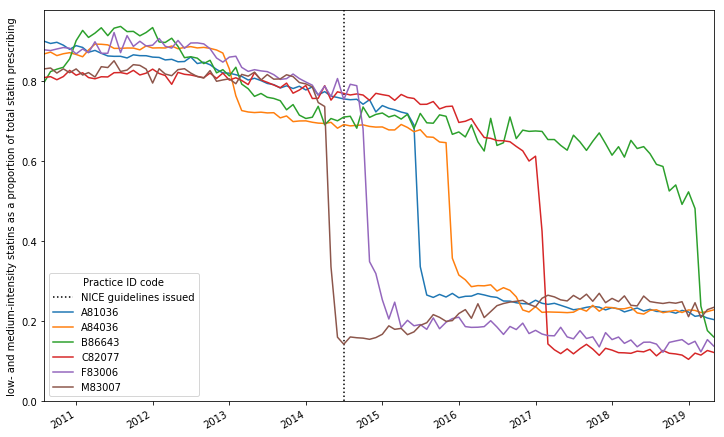

In [84]:
for_plotting = pd.read_csv('r_output.csv')
for_plotting = for_plotting.sort_values('is.slope.ma')
#for_plotting = for_plotting.loc[for_plotting['is.tfirst']==for_plotting['is.tfirst.offs']]
for_plotting = for_plotting.loc[for_plotting['is.intlev.levd']>for_plotting['is.intlev.levd'].quantile(0.9)]
#for_plotting = for_plotting.loc[for_plotting['is.slope.ma']<-0.05]
for_plotting = for_plotting.loc[for_plotting['is.slope.ma.prop.lev']<0.9]
for_plotting = for_plotting.loc[for_plotting['is.tfirst']==for_plotting['is.tfirst.offs']]

for_plotting.head()

biggest = for_plotting.head(8)
stacked = statin_measure.merge(biggest['name'], how='right',left_on='code',right_on='name')
stacked = stacked.groupby(['month','code']).sum()
unstacked = stacked.unstack()
unstacked = unstacked.dropna(axis=1)


import datetime

date_time_str = '2014-07-01'
date_time_obj = datetime.datetime.strptime(date_time_str, '%Y-%m-%d')


f = plt.figure(figsize=(12, 8))
layout = gridspec.GridSpec(1, 1, figure=f)
ax = plt.subplot(layout[0])
ax.axvline(date_time_obj,color='k',linestyle=':', label='NICE guidelines issued')
unstacked['calc_value'].plot(ax=ax)#,color=colors)
ax.set_ylabel('low- and medium-intensity statins as a proportion of total statin prescribing')
ax.set_xlabel('')
ax.set_ylim(0,)
ax.legend(title='Practice ID code')
#plt.savefig(r'CCGs_that_have_changed.png',dpi=300, bbox_inches = 'tight',pad_inches=0.1)
plt.savefig(r'CCGs_that_have_changed.png',bbox_inches = 'tight',pad_inches=0.1)
plt.show()